# Data Cleaning

In [1]:
%run doc2vec_launcher
import doc2vec_launcher
import collections
import matplotlib
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import re
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
sno = nltk.stem.SnowballStemmer('english')
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
import math

2


In [2]:
retval=os.chdir("../input/clean_data/")
countries = glob.glob("*.txt")
countries = [w.replace('.txt', '') for w in countries]
countries.sort()
retval=os.chdir("../../scripts/")

In [3]:
stopwords = stopwords.words('english')
stopwords += ['mr', 'non']

In [4]:
def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]
def wordListToFreqDict(wordlist):
    wordfreq = [wordlist.count(p) for p in wordlist]
    return dict(zip(wordlist,wordfreq))
def sortFreqDict(freqdict):
    aux = [(key, freqdict[key]) for key in freqdict]
    aux.sort()
    return aux

In [12]:
df = pd.DataFrame("", index=np.arange(0), columns=['word'])
print("NON-AVAILABLE COUNTRIES:")
for country in countries:
    with open('../input/clean_data/{}.txt'.format(country), 'r') as myfile:
        speech=myfile.read().replace('\n', ' ')
    speech = speech.lower()
    speech = re.sub('[^a-z]', ' ', speech)
    wordlist = speech.split()
    wordlist = removeStopwords(wordlist=wordlist, stopwords = stopwords)
    
    table = sortFreqDict(wordListToFreqDict(wordlist=wordlist))
    
    if len(table) == 0:
        print(country)
        
    else:
        table = pd.DataFrame(np.array(table), columns = ['word', 'count'])
        table['count'] = pd.to_numeric(table['count'])
        table['word_'] = table['word'].apply(lambda x: sno.stem(x))
        del table['word']        

        grouped = pd.DataFrame({'freq' : table.groupby(['word_'])['count'].agg('sum')}).reset_index()
        grouped['freq'] = grouped['freq']/grouped['freq'].sum()
    
        df = pd.merge(df, grouped, how = 'outer', left_on='word', right_on='word_')
        df['word'] = np.where(df['word'].isnull(), df['word_'], df['word'])
        df[country] = df['freq']
        del df['word_']
        del df['freq']

df = df.sort_values('word').reset_index(drop = True)

NON-AVAILABLE COUNTRIES:
Bahrain
Kenya
Lao_People’s_Democratic_Republic
Lebanon
Mongolia
Nicaragua
Palestine_(State_of)
Qatar
The_former_Yugoslav_Republic_of_Macedonia


In [13]:
df.describe(include = 'all')

,word,Afghanistan,Albania,Angola,Antigua_and_Barbuda,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom_of_Great_Britain_and_Northern_Ireland,United_Republic_of_Tanzania,United_States_of_America,Uzbekistan,Viet_Nam,Zambia,Zimbabwe
count,8848,609.000000,610.000000,517.000000,642.000000,536.000000,474.000000,426.000000,507.000000,715.000000,...,263.000000,731.000000,582.000000,678.000000,673.000000,963.000000,558.000000,470.000000,567.000000,439.000000
unique,8848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,interconnected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.001642,0.001639,0.001934,0.001558,0.001866,0.002110,0.002347,0.001972,0.001399,...,0.003802,0.001368,0.001718,0.001475,0.001486,0.001038,0.001792,0.002128,0.001764,0.002278
std,NaN,0.001548,0.001445,0.002313,0.001812,0.001942,0.002425,0.001918,0.002898,0.001716,...,0.002916,0.001739,0.002253,0.001712,0.001791,0.001658,0.001757,0.002241,0.001943,0.002236
min,NaN,0.000967,0.000902,0.000984,0.000806,0.001070,0.001103,0.001364,0.000928,0.000730,...,0.002469,0.000690,0.000785,0.000640,0.000824,0.000421,0.000917,0.001166,0.000946,0.001418
25%,NaN,0.000967,0.000902,0.000984,0.000806,0.001070,0.001103,0.001364,0.000928,0.000730,...,0.002469,0.000690,0.000785,0.000640,0.000824,0.000421,0.000917,0.001166,0.000946,0.001418
50%,NaN,0.000967,0.000902,0.000984,0.000806,0.001070,0.001103,0.001364,0.000928,0.000730,...,0.002469,0.000690,0.000785,0.000640,0.000824,0.000421,0.000917,0.001166,0.000946,0.001418
75%,NaN,0.001934,0.001803,0.001969,0.001612,0.002139,0.002205,0.002729,0.001855,0.001460,...,0.002469,0.001379,0.001570,0.001280,0.001649,0.001263,0.001835,0.002331,0.001892,0.002837


## Example of USA and France:

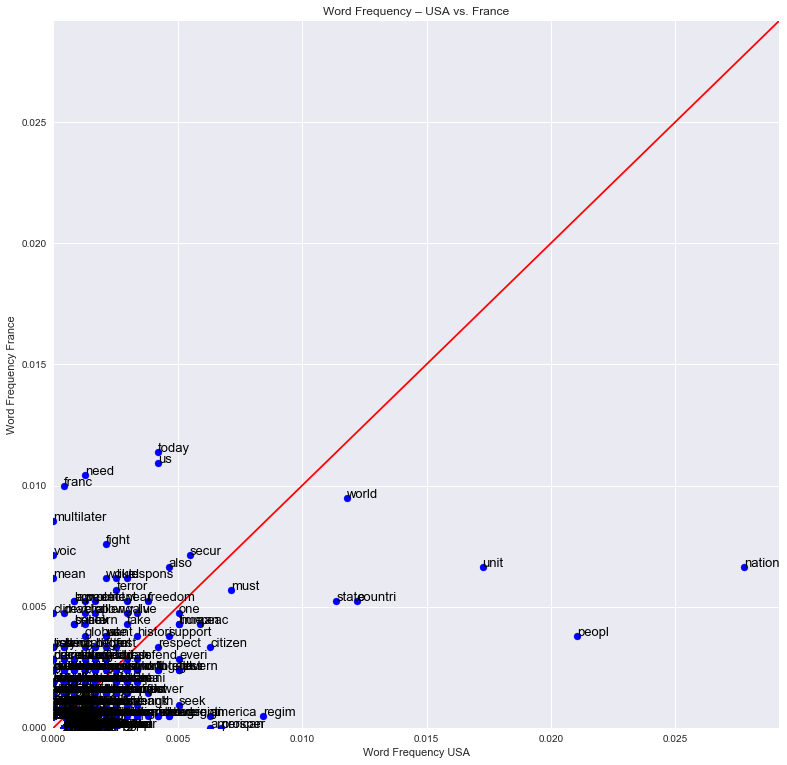

In [14]:
usa_france = df[(df['United_States_of_America'].isnull() == False) 
                |(df['France'].isnull() == False) 
               ][['word','United_States_of_America', 'France']].copy()
usa_france = usa_france.fillna(0).reset_index(drop = True)

x_plot = usa_france['United_States_of_America']
y_plot = usa_france['France']
labels_plot = usa_france['word']

fig, ax = plt.subplots(1, 1, figsize = (13,13))
plt.scatter(x_plot, y_plot, color='blue')
plt.plot([0, 1], [0, 1], '-', color = 'red')

for i, j, k in zip(x_plot, y_plot, labels_plot):
    ax.annotate('%s' %k, xy = (i,j), fontsize = 13, color = 'black');

ax.set_xlim(left=0, right = 1.05*max(max(x_plot), max(y_plot)))
ax.set_ylim(bottom=0, top = 1.05*max(max(x_plot), max(y_plot)))
ax.set_title('Word Frequency – USA vs. France')
plt.xlabel('Word Frequency USA')
plt.ylabel('Word Frequency France')

## LDA analysis

## PCA on word count:

In [13]:
df1 = df.copy()
print(df1.shape)

(8748, 139)


___ Restrict to G20 countries:___

In [14]:
column_subset = ['word'
                    , 'Australia'
                    , 'Brazil'
                    , 'European_Union'
                    , 'France'
                    , 'Germany'
                    , 'India'
                    , 'Indonesia'
                    , 'Italy'
                    , 'Japan'
                    , 'Republic_of_Korea'
                    , 'Russian_Federation'
                    , 'South_Africa'
                    , 'Turkey'
                    , 'United_Kingdom_of_Great_Britain_and_Northern_Ireland'
                    , 'United_States_of_America'
                   ]

In [15]:
df1 = df1[column_subset]

In [16]:
df1.shape

(8748, 16)

In [17]:
columns = list(df1)
country_columns = columns[1:]
for country in country_columns:
    df1[country] = df1[country].fillna(0)

___ Limit data to words refered to by at least 'n' countries:___

In [18]:
n = 5
df1['occurrence'] = ((df1.astype(bool).sum(axis=1))-1)
df1 = df1[df1['occurrence']>n]
del df1['occurrence']
print(df1.shape)

(487, 16)


___ PCA analysis:___

In [19]:
df2 = df1.transpose().copy()
df2.columns = df2.iloc[0].values.tolist()
df2 = df2.iloc[1:]
df2 = df2.reset_index()

In [20]:
X = df2.iloc[:,1:].values
y_ = df2.iloc[:, 0].values

In [22]:
X_std = StandardScaler().fit_transform(X)

/Users/nj995/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

___Plot 2 axes:___

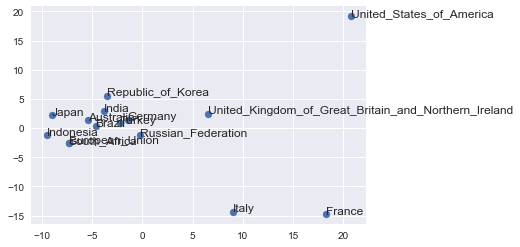

In [24]:
y=Y_sklearn[:,0]
z=Y_sklearn[:,1]
n=y_

fig, ax = plt.subplots()
ax.scatter(y, z)

for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], z[i]))

___ Contributions:___

In [25]:
res = sklearn_pca.transform(np.eye(X.shape[1]))

In [26]:
res_2 = pd.DataFrame(res, columns = ['PCA1', 'PCA2'])

In [27]:
res_2['word'] = list(df2)[1:]

In [28]:
res_2.sort_values('PCA1')

,PCA1,PCA2,word
381,-0.052015,0.005919,rise
76,-0.045343,0.001152,congratul
121,-0.044205,-0.001150,economi
442,-0.041980,-0.012913,theme
328,-0.041711,0.012207,presid
440,-0.041162,0.022371,test
428,-0.040723,-0.027031,sustain
421,-0.039763,0.020819,strive
15,-0.037736,-0.003565,agenda
409,-0.035986,0.000259,south


In [29]:
res_2.sort_values('PCA2')

,PCA1,PCA2,word
60,0.045029,-0.105930,climat
332,0.049259,-0.096978,prioriti
302,0.046673,-0.094926,particular
188,0.051528,-0.093021,ground
237,0.031120,-0.090430,key
401,0.050743,-0.089988,sign
279,0.055004,-0.089875,moral
252,0.021446,-0.089453,libya
70,0.040143,-0.087879,concern
452,0.039375,-0.083447,traffick


## Word2Vec Analysis

In [8]:
n_words =10000
list_of_speeches = list() 
count = collections.Counter()
for i, country in enumerate(countries):
    with open('../input/clean_data/{}.txt'.format(country), 'r') as myfile:
        speech=myfile.read().replace('\n', ' ')
    speech = speech.lower()
    speech = re.sub('[^a-z]', ' ', speech)
    wordlist = speech.split()
    wordlist = removeStopwords(wordlist=wordlist, stopwords = stopwords)
    count.update(wordlist)
    list_of_speeches.append(wordlist)

dictionary = dict()
vocabulary_size = 0
for word in count:
    dictionary[word] = len(dictionary)
    vocabulary_size += 1
    
list_of_speeches_changed = list()

for i, speech in enumerate(list_of_speeches):
    sub_list = list()
    for word in speech:
        index = dictionary.get(word, 0)
        sub_list.append(index)
    list_of_speeches_changed.append(sub_list)

    reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))


word_embeddings, doc2vec_embeddings = doc2vec_training(list_of_speeches_changed, vocabulary_size, 30)
print(word_embeddings[0])

One epoch is 157378 steps
batch size = 2000 so 78.689 batches per epoch
INFO:tensorflow:Summary name embedding_matrices/word_embeddings:0/grad/hist is illegal; using embedding_matrices/word_embeddings_0/grad/hist instead.
INFO:tensorflow:Summary name embedding_matrices/word_embeddings:0/grad/sparsity is illegal; using embedding_matrices/word_embeddings_0/grad/sparsity instead.
INFO:tensorflow:Summary name embedding_matrices/doc_embeddings:0/grad/hist is illegal; using embedding_matrices/doc_embeddings_0/grad/hist instead.
INFO:tensorflow:Summary name embedding_matrices/doc_embeddings:0/grad/sparsity is illegal; using embedding_matrices/doc_embeddings_0/grad/sparsity instead.
INFO:tensorflow:Summary name loss/nce_weights:0/grad/hist is illegal; using loss/nce_weights_0/grad/hist instead.
INFO:tensorflow:Summary name loss/nce_weights:0/grad/sparsity is illegal; using loss/nce_weights_0/grad/sparsity instead.
INFO:tensorflow:Summary name loss/nce_biases:0/grad/hist is illegal; using loss/